<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Cadastre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
!pip install contextily



In [ ]:
#On importe nos modules
import geopandas as gpd
import pandas as pd
import os
import contextily as ctx
import matplotlib.pyplot as plt
#!pip freeze | grep geopandas



In [ ]:
#Téléchargement des datas depuis cadastre.data.gouv
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/batiments -O batiments.zip
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/parcelles -O parcelles.zip
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/sections -O sections.zip

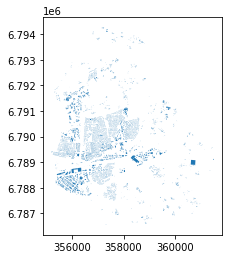

In [4]:
#Chargement couche Batiments
Batiments= gpd.read_file("batiments.zip", encoding='utf-8')
Batiments.head()
Batiments.plot()

In [5]:
#Compter le nombre de batiments
total1 = Batiments['geometry'].count()
print(total1)

8894


,id,commune,prefixe,section,numero,contenance,created,updated,geometry
0,35051000AA0564,35051,000,AA,564,21375.0,2004-06-18,2019-11-21,"POLYGON ((357004.270 6790658.715, 357003.201 6..."
1,35051000AA0562,35051,000,AA,562,42655.0,2004-06-18,2019-11-21,"POLYGON ((357405.271 6790540.522, 357405.178 6..."
2,35051000AA0563,35051,000,AA,563,6378.0,2004-06-18,2019-11-21,"POLYGON ((357639.229 6790355.015, 357655.624 6..."
3,35051000AA0566,35051,000,AA,566,959.0,2004-06-18,2019-11-21,"POLYGON ((357124.631 6790338.265, 357111.573 6..."
4,35051000AA0192,35051,000,AA,192,6752.0,2004-06-18,2019-11-21,"POLYGON ((357417.028 6790716.924, 357414.352 6..."


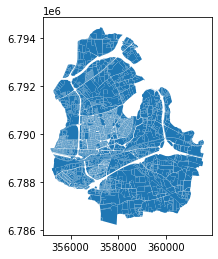

In [6]:
#Chargement couche Parcelles
Parcelles= gpd.read_file("parcelles.zip", encoding='utf-8')
Parcelles.plot()
Parcelles.head()

,id,commune,prefixe,code,created,updated,geometry
0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,"POLYGON ((357517.470 6790911.435, 357520.109 6..."
1,35051000AB,35051,000,AB,2004-05-27,2017-09-14,"POLYGON ((357360.791 6790345.960, 357379.108 6..."
2,35051000AC,35051,000,AC,2004-05-27,2017-09-14,"POLYGON ((357715.587 6790006.212, 357744.231 6..."
3,35051000AD,35051,000,AD,2004-05-27,2017-09-14,"POLYGON ((358092.442 6790328.433, 358107.943 6..."
4,35051000AE,35051,000,AE,2004-05-27,2017-09-14,"POLYGON ((358200.027 6790860.405, 358204.701 6..."


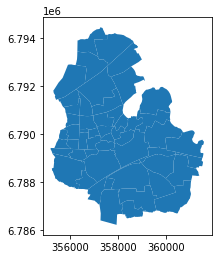

In [7]:
#Chargement couche Sections
Sections= gpd.read_file("sections.zip", encoding='utf-8')
Sections.plot()
Sections.head()

In [8]:
# Créer un ID unique pour chaque section

Sections["ID_Section"] = Sections["prefixe"] + "-" + Sections["code"]
Sections.head()

,id,commune,prefixe,code,created,updated,geometry,ID_Section
0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,"POLYGON ((357517.470 6790911.435, 357520.109 6...",000-AA
1,35051000AB,35051,000,AB,2004-05-27,2017-09-14,"POLYGON ((357360.791 6790345.960, 357379.108 6...",000-AB
2,35051000AC,35051,000,AC,2004-05-27,2017-09-14,"POLYGON ((357715.587 6790006.212, 357744.231 6...",000-AC
3,35051000AD,35051,000,AD,2004-05-27,2017-09-14,"POLYGON ((358092.442 6790328.433, 358107.943 6...",000-AD
4,35051000AE,35051,000,AE,2004-05-27,2017-09-14,"POLYGON ((358200.027 6790860.405, 358204.701 6...",000-AE


In [9]:
# Créer un ID unique pour chaque parcelle

Parcelles["ID_Parcelle"] = Parcelles["prefixe"] + "-" + Parcelles["section"] + "-" + Parcelles["numero"]
Parcelles.head(5)

,id,commune,prefixe,section,numero,contenance,created,updated,geometry,ID_Parcelle
0,35051000AA0564,35051,000,AA,564,21375.0,2004-06-18,2019-11-21,"POLYGON ((357004.270 6790658.715, 357003.201 6...",000-AA-564
1,35051000AA0562,35051,000,AA,562,42655.0,2004-06-18,2019-11-21,"POLYGON ((357405.271 6790540.522, 357405.178 6...",000-AA-562
2,35051000AA0563,35051,000,AA,563,6378.0,2004-06-18,2019-11-21,"POLYGON ((357639.229 6790355.015, 357655.624 6...",000-AA-563
3,35051000AA0566,35051,000,AA,566,959.0,2004-06-18,2019-11-21,"POLYGON ((357124.631 6790338.265, 357111.573 6...",000-AA-566
4,35051000AA0192,35051,000,AA,192,6752.0,2004-06-18,2019-11-21,"POLYGON ((357417.028 6790716.924, 357414.352 6...",000-AA-192


In [10]:
#Créer un ID unique pour chaque batiment

Batiments["ID_Bati"] = Batiments.index
Batiments.head()

,commune,nom,type,created,updated,geometry,ID_Bati
0,35051,None,02,2004-06-18,2018-06-12,"POLYGON ((357089.170 6790474.569, 357087.759 6...",0
1,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357099.887 6790523.903, 357097.519 6...",1
2,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357210.803 6790466.891, 357213.233 6...",2
3,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357108.530 6790373.682, 357119.618 6...",3
4,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357113.809 6790395.515, 357120.523 6...",4


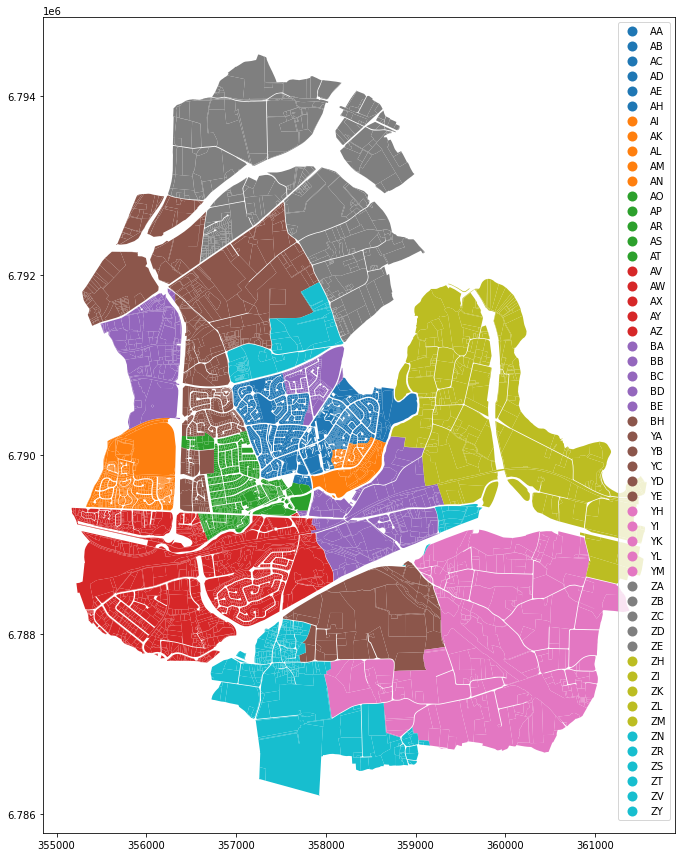

In [11]:
#Faire une carte des parcelles cadastrales avec une catégorisation par section avec un export de la carte en image

map1 = Parcelles.plot(figsize=(15,15),column='section', legend=True).get_figure()
map1.savefig("map1.png")


In [12]:
# Vérifier le SCR des couches

Batiments.crs
Parcelles.crs
Sections.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
# Ajouter une colonne surface aux sections cadastrales

Sections["Surface_Section"] = Sections['geometry'].area
Sections.head(10) 

,id,commune,prefixe,code,created,updated,geometry,ID_Section,Surface_Section
0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,"POLYGON ((357517.470 6790911.435, 357520.109 6...",000-AA,369063.408196
1,35051000AB,35051,000,AB,2004-05-27,2017-09-14,"POLYGON ((357360.791 6790345.960, 357379.108 6...",000-AB,214289.844646
2,35051000AC,35051,000,AC,2004-05-27,2017-09-14,"POLYGON ((357715.587 6790006.212, 357744.231 6...",000-AC,142514.452758
3,35051000AD,35051,000,AD,2004-05-27,2017-09-14,"POLYGON ((358092.442 6790328.433, 358107.943 6...",000-AD,191803.352173
4,35051000AE,35051,000,AE,2004-05-27,2017-09-14,"POLYGON ((358200.027 6790860.405, 358204.701 6...",000-AE,228557.377366
5,35051000AH,35051,000,AH,2004-05-27,2017-09-14,"POLYGON ((358539.808 6790744.566, 358543.428 6...",000-AH,289118.451242
6,35051000AI,35051,000,AI,2004-05-27,2017-09-14,"POLYGON ((358497.269 6790194.431, 358505.291 6...",000-AI,320672.307780
7,35051000AK,35051,000,AK,2004-05-27,2017-09-14,"POLYGON ((355517.130 6789821.877, 355517.951 6...",000-AK,187119.027078
8,35051000AL,35051,000,AL,2004-05-27,2017-09-14,"POLYGON ((355676.370 6790202.111, 355688.551 6...",000-AL,132812.366441
9,35051000AM,35051,000,AM,2004-05-27,2017-09-14,"POLYGON ((356225.098 6790411.637, 356226.477 6...",000-AM,316638.399777


In [ ]:
# Ajouter une colonne surface aux parcelles cadastrales

Parcelles["Surface_Parcelle"] = Parcelles['geometry'].area
Parcelles.head(10) 

,id,commune,prefixe,section,numero,contenance,created,updated,geometry,ID_Parcelle,Surface_Parcelle
0,35051000AA0564,35051,000,AA,564,21375.0,2004-06-18,2019-11-21,"POLYGON ((357004.270 6790658.715, 357003.201 6...",000-AA-564,23922.911984
1,35051000AA0562,35051,000,AA,562,42655.0,2004-06-18,2019-11-21,"POLYGON ((357405.271 6790540.522, 357405.178 6...",000-AA-562,42587.307820
2,35051000AA0563,35051,000,AA,563,6378.0,2004-06-18,2019-11-21,"POLYGON ((357639.229 6790355.015, 357655.624 6...",000-AA-563,5647.509707
3,35051000AA0566,35051,000,AA,566,959.0,2004-06-18,2019-11-21,"POLYGON ((357124.631 6790338.265, 357111.573 6...",000-AA-566,1613.160670
4,35051000AA0192,35051,000,AA,192,6752.0,2004-06-18,2019-11-21,"POLYGON ((357417.028 6790716.924, 357414.352 6...",000-AA-192,6609.099724
5,35051000AA0565,35051,000,AA,565,2881.0,2004-06-18,2019-11-21,"POLYGON ((357004.270 6790658.715, 357014.531 6...",000-AA-565,3063.325236
6,35051000AA0553,35051,000,AA,553,1290.0,2004-06-18,2019-11-21,"POLYGON ((357028.302 6790578.606, 357025.147 6...",000-AA-553,1287.809973
7,35051000AA0059,35051,000,AA,59,619.0,2004-06-18,2019-11-21,"POLYGON ((357024.044 6790482.974, 357016.068 6...",000-AA-59,621.336887
8,35051000AA0089,35051,000,AA,89,698.0,2004-06-18,2019-11-21,"POLYGON ((357112.439 6790467.687, 357105.550 6...",000-AA-89,701.243504
9,35051000AA0088,35051,000,AA,88,715.0,2004-06-18,2019-11-21,"POLYGON ((357112.439 6790467.687, 357090.570 6...",000-AA-88,706.718863


In [ ]:
# Ajouter une colonne surface aux batiments

Batiments["Surface_Batiment"] = Batiments['geometry'].area
Batiments.head(10) 

,commune,nom,type,created,updated,geometry,ID_Bati,Surface_Batiment
0,35051,None,02,2004-06-18,2018-06-12,"POLYGON ((357089.170 6790474.569, 357087.759 6...",0,10.835598
1,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357099.887 6790523.903, 357097.519 6...",1,156.415285
2,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357210.803 6790466.891, 357213.233 6...",2,100.495147
3,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357108.530 6790373.682, 357119.618 6...",3,132.496058
4,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357113.809 6790395.515, 357120.523 6...",4,91.291023
5,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357127.911 6790406.480, 357134.893 6...",5,111.440761
6,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357132.822 6790410.178, 357142.209 6...",6,139.104492
7,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357159.227 6790415.492, 357166.063 6...",7,84.995102
8,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357149.649 6790430.779, 357157.031 6...",8,98.878468
9,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357136.659 6790442.793, 357144.570 6...",9,111.671953


,commune,nom,type,created,updated,geometry,ID_Bati,Surface_Batiment
0,35051,None,02,2004-06-18,2018-06-12,POINT (357090.104 6790476.401),0,10.835598
1,35051,None,01,2004-06-18,2018-06-12,POINT (357091.551 6790520.886),1,156.415285
2,35051,None,01,2004-06-18,2018-06-12,POINT (357211.654 6790458.961),2,100.495147
3,35051,None,01,2004-06-18,2018-06-12,POINT (357115.256 6790368.125),3,132.496058
4,35051,None,01,2004-06-18,2018-06-12,POINT (357113.730 6790388.793),4,91.291023


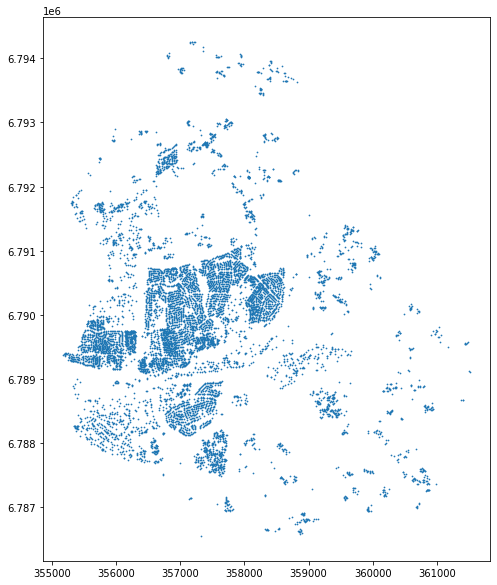

In [ ]:
#Transformer les batiments (polygones) en points (centroides)

BatimentsCentro = Batiments.copy()
BatimentsCentro.geometry = BatimentsCentro['geometry'].centroid
BatimentsCentro.crs =Batiments.crs
BatimentsCentro.plot(figsize=(300,10), markersize=0.5, legend=True)
BatimentsCentro.head()

In [ ]:
# Encrichir les batiments des informations de la couche des Sections Cadastrales (jointure spatiale)

BatimentsEtape1 = gpd.sjoin(BatimentsCentro, Sections)
BatimentsEtape1.head(5)

,commune_left,nom,type,created_left,updated_left,geometry,ID_Bati,Surface_Batiment,index_right,id,commune_right,prefixe,code,created_right,updated_right,ID_Section,Surface_Section
0,35051,None,02,2004-06-18,2018-06-12,POINT (357090.104 6790476.401),0,10.835598,0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196
1,35051,None,01,2004-06-18,2018-06-12,POINT (357091.551 6790520.886),1,156.415285,0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196
2,35051,None,01,2004-06-18,2018-06-12,POINT (357211.654 6790458.961),2,100.495147,0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196
3,35051,None,01,2004-06-18,2018-06-12,POINT (357115.256 6790368.125),3,132.496058,0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196
4,35051,None,01,2004-06-18,2018-06-12,POINT (357113.730 6790388.793),4,91.291023,0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196


In [ ]:
#Réorganiser la table

BatimentsEtape2 = BatimentsEtape1[["ID_Bati", "type", "code", "Surface_Batiment", "ID_Section", "Surface_Section", "geometry"]]
BatimentsEtape2.head()

,ID_Bati,type,code,Surface_Batiment,ID_Section,Surface_Section,geometry
0,0,02,AA,10.835598,000-AA,369063.408196,POINT (357090.104 6790476.401)
1,1,01,AA,156.415285,000-AA,369063.408196,POINT (357091.551 6790520.886)
2,2,01,AA,100.495147,000-AA,369063.408196,POINT (357211.654 6790458.961)
3,3,01,AA,132.496058,000-AA,369063.408196,POINT (357115.256 6790368.125)
4,4,01,AA,91.291023,000-AA,369063.408196,POINT (357113.730 6790388.793)


In [ ]:
# Encrichir les batiments des informations de la couche des parcelles Cadastrales (jointure spatiale)

BatimentsEtape3 = gpd.sjoin(BatimentsEtape2, Parcelles)
BatimentsEtape3.head(5)

,ID_Bati,type,code,Surface_Batiment,ID_Section,Surface_Section,geometry,index_right,id,commune,prefixe,section,numero,contenance,created,updated,ID_Parcelle,Surface_Parcelle
0,0,02,AA,10.835598,000-AA,369063.408196,POINT (357090.104 6790476.401),8,35051000AA0089,35051,000,AA,89,698.0,2004-06-18,2019-11-21,000-AA-89,701.243504
15,15,01,AA,159.092542,000-AA,369063.408196,POINT (357094.986 6790473.368),8,35051000AA0089,35051,000,AA,89,698.0,2004-06-18,2019-11-21,000-AA-89,701.243504
1,1,01,AA,156.415285,000-AA,369063.408196,POINT (357091.551 6790520.886),32,35051000AA0067,35051,000,AA,67,576.0,2004-06-18,2019-11-21,000-AA-67,583.170712
2,2,01,AA,100.495147,000-AA,369063.408196,POINT (357211.654 6790458.961),54,35051000AA0127,35051,000,AA,127,455.0,2004-06-18,2019-11-21,000-AA-127,456.044515
3,3,01,AA,132.496058,000-AA,369063.408196,POINT (357115.256 6790368.125),23,35051000AA0104,35051,000,AA,104,650.0,2004-06-18,2019-11-21,000-AA-104,654.934381


In [ ]:
#Réorganiser la table

BatimentsFinal = BatimentsEtape3[["ID_Bati", "type", "code", "Surface_Batiment", "ID_Section", "Surface_Section", "ID_Parcelle", "Surface_Parcelle", "geometry"]]
BatimentsFinal.head()

,ID_Bati,type,code,Surface_Batiment,ID_Section,Surface_Section,ID_Parcelle,Surface_Parcelle,geometry
0,0,02,AA,10.835598,000-AA,369063.408196,000-AA-89,701.243504,POINT (357090.104 6790476.401)
15,15,01,AA,159.092542,000-AA,369063.408196,000-AA-89,701.243504,POINT (357094.986 6790473.368)
1,1,01,AA,156.415285,000-AA,369063.408196,000-AA-67,583.170712,POINT (357091.551 6790520.886)
2,2,01,AA,100.495147,000-AA,369063.408196,000-AA-127,456.044515,POINT (357211.654 6790458.961)
3,3,01,AA,132.496058,000-AA,369063.408196,000-AA-104,654.934381,POINT (357115.256 6790368.125)


In [ ]:
# Jointure attributaire pour repasser sur la couche des polygones

BatimentsFinalOk = Batiments.merge(BatimentsFinal, on='ID_Bati')
BatimentsFinalOk.head()

,commune,nom,type_x,created,updated,geometry_x,ID_Bati,Surface_Batiment_x,type_y,code,Surface_Batiment_y,ID_Section,Surface_Section,ID_Parcelle,Surface_Parcelle,geometry_y
0,35051,None,02,2004-06-18,2018-06-12,"POLYGON ((357089.170 6790474.569, 357087.759 6...",0,10.835598,02,AA,10.835598,000-AA,369063.408196,000-AA-89,701.243504,POINT (357090.104 6790476.401)
1,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357099.887 6790523.903, 357097.519 6...",1,156.415285,01,AA,156.415285,000-AA,369063.408196,000-AA-67,583.170712,POINT (357091.551 6790520.886)
2,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357210.803 6790466.891, 357213.233 6...",2,100.495147,01,AA,100.495147,000-AA,369063.408196,000-AA-127,456.044515,POINT (357211.654 6790458.961)
3,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357108.530 6790373.682, 357119.618 6...",3,132.496058,01,AA,132.496058,000-AA,369063.408196,000-AA-104,654.934381,POINT (357115.256 6790368.125)
4,35051,None,01,2004-06-18,2018-06-12,"POLYGON ((357113.809 6790395.515, 357120.523 6...",4,91.291023,01,AA,91.291023,000-AA,369063.408196,000-AA-103,606.391468,POINT (357113.730 6790388.793)


In [ ]:
#Réorganiser la table
BatimentsFinalOk = BatimentsFinalOk[["ID_Bati", "type_x", "Surface_Batiment_x", "ID_Section", "Surface_Section", "ID_Parcelle", "Surface_Parcelle", "geometry_x"]]
BatimentsFinalOk.rename(columns={'type_x': 'type','Surface_Batiment_x': 'Surface_Batiment','geometry_x': 'Geometry'}, inplace=True)
BatimentsFinalOk.head()

,ID_Bati,type,Surface_Batiment,ID_Section,Surface_Section,ID_Parcelle,Surface_Parcelle,Geometry
0,0,02,10.835598,000-AA,369063.408196,000-AA-89,701.243504,"POLYGON ((357089.170 6790474.569, 357087.759 6..."
1,1,01,156.415285,000-AA,369063.408196,000-AA-67,583.170712,"POLYGON ((357099.887 6790523.903, 357097.519 6..."
2,2,01,100.495147,000-AA,369063.408196,000-AA-127,456.044515,"POLYGON ((357210.803 6790466.891, 357213.233 6..."
3,3,01,132.496058,000-AA,369063.408196,000-AA-104,654.934381,"POLYGON ((357108.530 6790373.682, 357119.618 6..."
4,4,01,91.291023,000-AA,369063.408196,000-AA-103,606.391468,"POLYGON ((357113.809 6790395.515, 357120.523 6..."


,ID_Bati,type,Surface_Batiment,ID_Section,Surface_Section,ID_Parcelle,Surface_Parcelle,Geometry
0,0,02,10.835598,000-AA,369063.408196,000-AA-89,701.243504,"POLYGON ((357089.170 6790474.569, 357087.759 6..."
1,1,01,156.415285,000-AA,369063.408196,000-AA-67,583.170712,"POLYGON ((357099.887 6790523.903, 357097.519 6..."
2,2,01,100.495147,000-AA,369063.408196,000-AA-127,456.044515,"POLYGON ((357210.803 6790466.891, 357213.233 6..."
3,3,01,132.496058,000-AA,369063.408196,000-AA-104,654.934381,"POLYGON ((357108.530 6790373.682, 357119.618 6..."
4,4,01,91.291023,000-AA,369063.408196,000-AA-103,606.391468,"POLYGON ((357113.809 6790395.515, 357120.523 6..."


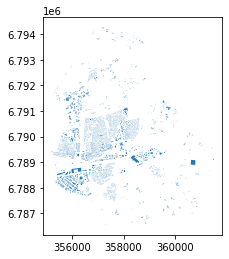

In [ ]:
#Repasser en GeoDataframe

BatiOK = gpd.GeoDataFrame(BatimentsFinalOk, crs="EPSG:2154", geometry='Geometry')
BatiOK.plot()
BatiOK.head()


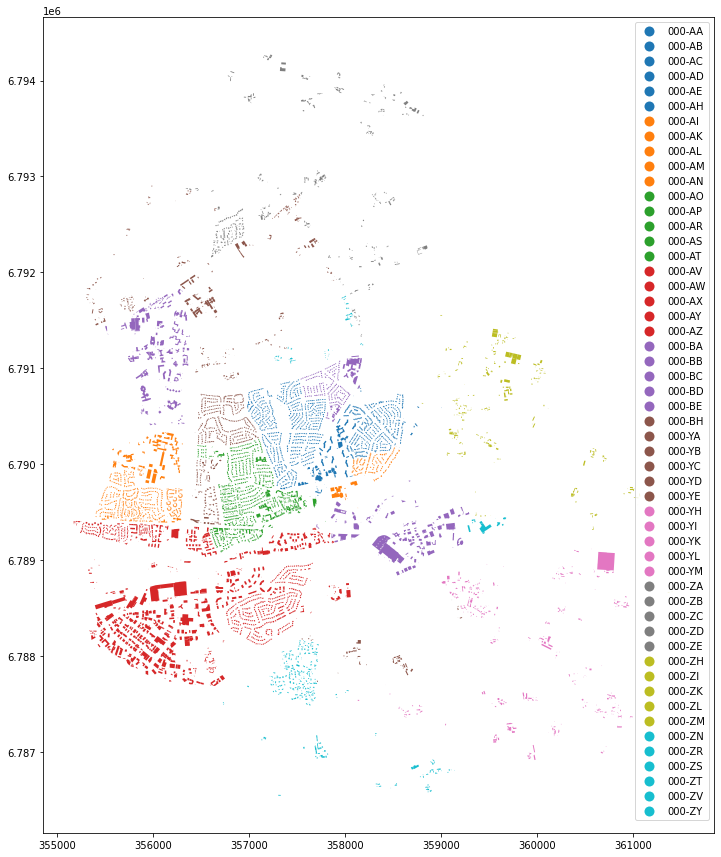

In [ ]:
# Faire une carte des batiments catégorisée par code de section

map2 = BatiOK.plot(figsize=(15,15), column='ID_Section', legend=True).get_figure()

map2.savefig("map2.png")

In [ ]:
#Ecrire un gpk

BatiOK.to_file("Batiments_Final.gpkg", layer='BatiOK', driver="GPKG")

#Ecrire un geojson

BatiOK.to_file("Batiments_Final.geojson", driver="GeoJSON")

#Ecrire un shapefile

BatiOK.to_file("Batiments_Final.shp")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Calculer le  nombre de batiments par sections cadastrale

NbBatiSection = BatiOK[["ID_Section", "ID_Bati"]].groupby("ID_Section").size()
NbBatiSection = pd.DataFrame(NbBatiSection)
NbBatiSection = NbBatiSection.rename(columns={0: 'NbBatis'})
NbBatiSection.head(10)

,NbBatis
ID_Section,
000-AA,473
000-AB,263
000-AC,104
000-AD,162
000-AE,268
000-AH,203
000-AI,193
000-AK,326
000-AL,132


In [ ]:
# Compter le nombre de batiment (vérification)

total1 = Batiments['geometry'].count()
total2 = NbBatiSection['NbBatis'].sum()
print(total1)
print(total1)

8893
8893


In [ ]:
# Jointure attributaire pour repasser sur la couche des sections cadastrales

Sections = Sections.merge(NbBatiSection, on='ID_Section')
Sections.head()

,id,commune,prefixe,code,created,updated,geometry,ID_Section,Surface_Section,NbBatis
0,35051000AA,35051,000,AA,2004-06-18,2017-09-14,"POLYGON ((357517.470 6790911.435, 357520.109 6...",000-AA,369063.408196,473
1,35051000AB,35051,000,AB,2004-05-27,2017-09-14,"POLYGON ((357360.791 6790345.960, 357379.108 6...",000-AB,214289.844646,263
2,35051000AC,35051,000,AC,2004-05-27,2017-09-14,"POLYGON ((357715.587 6790006.212, 357744.231 6...",000-AC,142514.452758,104
3,35051000AD,35051,000,AD,2004-05-27,2017-09-14,"POLYGON ((358092.442 6790328.433, 358107.943 6...",000-AD,191803.352173,162
4,35051000AE,35051,000,AE,2004-05-27,2017-09-14,"POLYGON ((358200.027 6790860.405, 358204.701 6...",000-AE,228557.377366,268


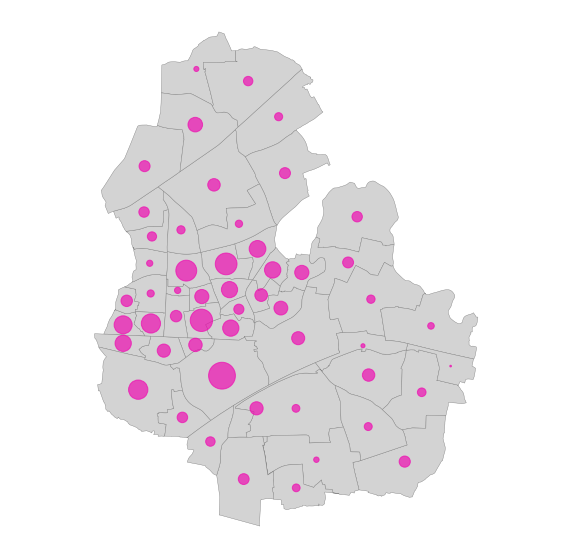

In [ ]:
# Faire une carte pour représenter le nombre de batiments pas section cadastrale

SectionsCentro = Sections.copy()
SectionsCentro.geometry = SectionsCentro['geometry'].centroid


map3, ax = plt.subplots(figsize=(10,10))
Sections.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4)
SectionsCentro.plot(ax=ax,color="#ee0db1", markersize="NbBatis",alpha=0.7, categorical=False, legend=True)
ax.axis("off")
plt.axis("equal")
plt.show()

map3.savefig("map3.png")

In [ ]:
# Calculer le Nombre de batiments par parcelle cadastrale

NbBatiParcelle  = BatiOK[["ID_Parcelle", "ID_Bati"]].groupby("ID_Parcelle").size()
NbBatiParcelle =pd.DataFrame(NbBatiParcelle)
NbBatiParcelle = NbBatiParcelle.rename(columns={0: 'NbBatis'})
NbBatiParcelle.head(20)

,NbBatis
ID_Parcelle,
000-AA-10,2
000-AA-100,1
000-AA-101,1
000-AA-102,1
000-AA-103,1
000-AA-104,1
000-AA-105,1
000-AA-106,1
000-AA-107,1


In [ ]:
# Compter le nombre de batiment

total1 = Batiments['geometry'].count()
total2 = NbBatiParcelle['NbBatis'].sum()
print(total1)
print(total1)

8893
8893


In [ ]:
# Jointure attributaire pour repasser sur la couche des parcelles  cadastrales

Parcellesbis = Parcelles.merge(NbBatiParcelle, on='ID_Parcelle')
Parcelles.head()

,id,commune,prefixe,section,numero,contenance,created,updated,geometry,ID_Parcelle,Surface_Parcelle
0,35051000AA0564,35051,000,AA,564,21375.0,2004-06-18,2019-11-21,"POLYGON ((357004.270 6790658.715, 357003.201 6...",000-AA-564,23922.911984
1,35051000AA0562,35051,000,AA,562,42655.0,2004-06-18,2019-11-21,"POLYGON ((357405.271 6790540.522, 357405.178 6...",000-AA-562,42587.307820
2,35051000AA0563,35051,000,AA,563,6378.0,2004-06-18,2019-11-21,"POLYGON ((357639.229 6790355.015, 357655.624 6...",000-AA-563,5647.509707
3,35051000AA0566,35051,000,AA,566,959.0,2004-06-18,2019-11-21,"POLYGON ((357124.631 6790338.265, 357111.573 6...",000-AA-566,1613.160670
4,35051000AA0192,35051,000,AA,192,6752.0,2004-06-18,2019-11-21,"POLYGON ((357417.028 6790716.924, 357414.352 6...",000-AA-192,6609.099724


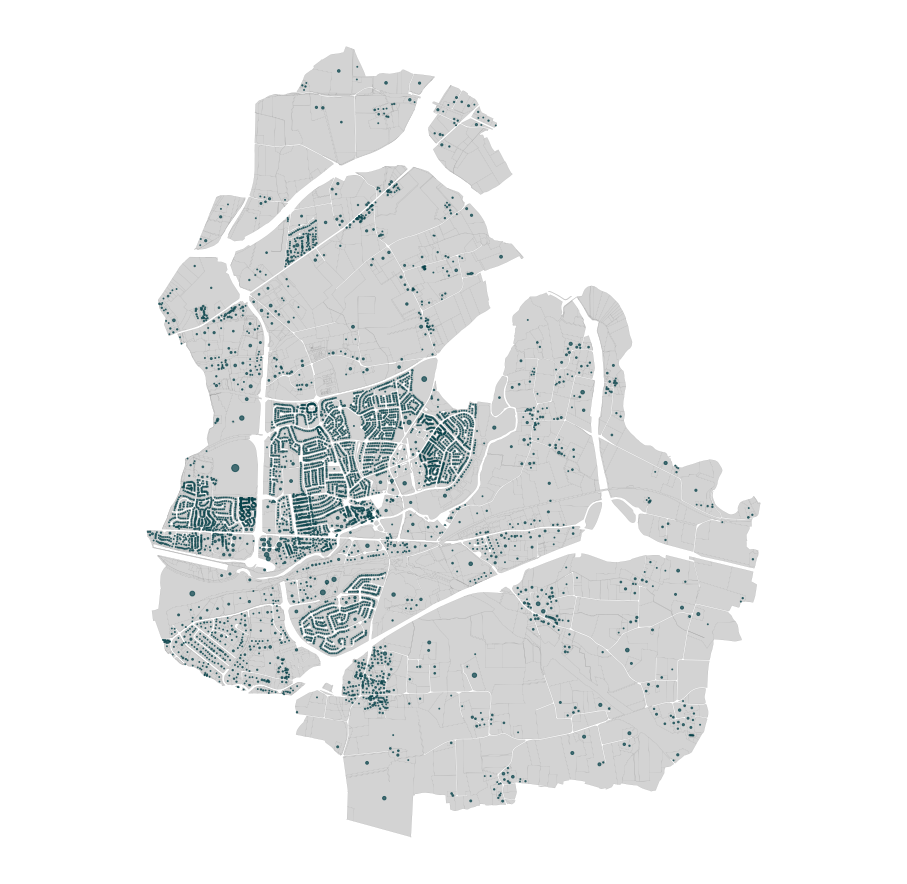

In [ ]:
# Faire une carte pour représenter le nombre de batiments par parcelle cadastrale

Parcellescentro = Parcellesbis.copy()
Parcellescentro.geometry = Parcellescentro['geometry'].centroid


map4, ax = plt.subplots(figsize=(16,16))
Parcelles.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)
Parcellescentro.plot(ax=ax,color="#07424A", markersize="NbBatis",alpha=0.7, categorical=False, legend=True)
ax.axis("off")
plt.axis("equal")
plt.show()

map4.savefig("map4.png")

In [ ]:
# Calculer la proportion des surfaces baties par parcelle cadastrale

recap = BatiOK.groupby('ID_Parcelle').agg({'Surface_Batiment':'sum','Surface_Parcelle':'max'})
recap["propbatiparcelle"] = recap["Surface_Batiment"] / recap["Surface_Parcelle"] *100
recap.head()

,Surface_Batiment,Surface_Parcelle,propbatiparcelle
ID_Parcelle,,,
000-AA-10,99.817772,796.936781,12.525181
000-AA-100,84.995102,421.926421,20.144532
000-AA-101,139.104492,644.720353,21.575942
000-AA-102,111.440761,528.437946,21.088713
000-AA-103,91.291023,606.391468,15.054800


In [ ]:
!pip install mapclassify
import mapclassify

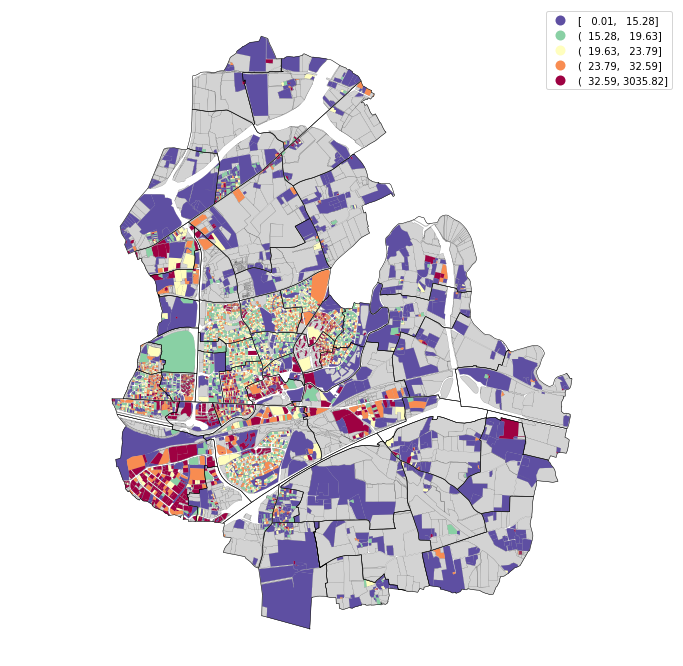

In [ ]:
# Faire la jointure attributaire avec la couche des parcelles cadastrales

Parcellesok = Parcellesbis.merge(recap, on='ID_Parcelle')
Parcellesok.head()


map5, ax = plt.subplots(figsize=(12,12))
Sections.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)
Parcelles.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.1)
Parcellesok.plot(ax=ax, column='propbatiparcelle', cmap='Spectral_r',scheme='quantiles', legend=True)
ax.axis("off")
plt.axis("equal")
plt.show()

map5.savefig("map5.png")

,geometry,id,prefixe,code,created,updated,ID_Section,Surface_Section
commune,,,,,,,,
35051,"POLYGON ((355221.192 6789262.326, 355220.428 6...",35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196


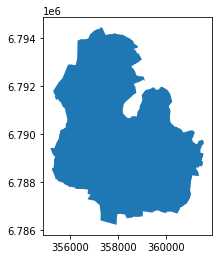

In [ ]:
# Créer une couche avec l'emprise de Cesson

Cesson = Sections.dissolve(by="commune")
Cesson.plot()
Cesson.head()

In [ ]:
#Téléchargement des datas depuis le portail opendata de Rennes
!wget -O hydrographie.geojson https://data.rennesmetropole.fr/explore/dataset/pvci_hydrographie/download/?format=geojson&timezone=Europe/Berlin&lang=fr 
!wget https://data.rennesmetropole.fr/explore/dataset/topologie-des-points-darret-de-bus-du-reseau-star/download/?format=geojson&timezone=Europe/Berlin&lang=fr -O bus.geojson
!wget https://data.rennesmetropole.fr/explore/dataset/synthese_pos_plu_2019/download/?format=geojson&timezone=Europe/Berlin&lang=fr -O PLU.geojson

--2021-01-28 15:01:50--  https://data.rennesmetropole.fr/explore/dataset/pvci_hydrographie/download/?format=geojson
Resolving data.rennesmetropole.fr (data.rennesmetropole.fr)... 34.249.199.226, 34.248.20.69
Connecting to data.rennesmetropole.fr (data.rennesmetropole.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘hydrographie.geojson’

hydrographie.geojso     [         <=>        ]  16.48M  1.06MB/s    in 15s     

2021-01-28 15:02:09 (1.09 MB/s) - ‘hydrographie.geojson’ saved [17277398]

/bin/bash: -O: command not found
--2021-01-28 15:02:09--  https://data.rennesmetropole.fr/explore/dataset/topologie-des-points-darret-de-bus-du-reseau-star/download/?format=geojson
Resolving data.rennesmetropole.fr (data.rennesmetropole.fr)... 34.249.199.226, 34.248.20.69
Connecting to data.rennesmetropole.fr (data.rennesmetropole.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK

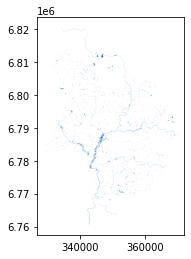

In [ ]:
#Chargement couche hydrographie
Hydrographie= gpd.read_file("index.html?format=geojson.9", encoding='utf-8')
Hydrographie = Hydrographie.to_crs("EPSG:2154")
Hydrographie.head()
Hydrographie.plot()

,nom,nomcommune,code,mobilier,estaccessiblepmr,id,codeinseecommune,geometry
0,Foyer Rennais,Rennes,1265,Abri double,true,1265,35238,POINT (351299.520 6788067.308)
1,Jules Ferry,Rennes,1262,Abri simple,true,1262,35238,POINT (352642.144 6790399.188)
2,Morbihan,Rennes,1257,Abri simple,true,1257,35238,POINT (352966.062 6791626.750)
3,Mouézy,Rennes,1244,Abri simple,true,1244,35238,POINT (353697.631 6788193.348)
4,Pavie,Rennes,1247,Poteau,true,1247,35238,POINT (354562.563 6788437.477)


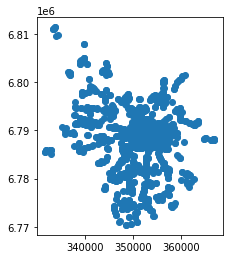

In [ ]:
#Chargement couche des bus
Bus= gpd.read_file("index.html?format=geojson.10", encoding='utf-8')
Bus = Bus.to_crs("EPSG:2154")
Bus.plot()
Bus.head()


,typezone,objectid,libelle,id_docurba,gml_id,datvalid,destdomi,libelong,geometry
0,N,24,N,00003506520130708,plu_synthese_2019.24,20130708,None,None,"MULTIPOLYGON (((338417.811 6790671.012, 338438..."
1,N,14,N,00003506520130708,plu_synthese_2019.14,20130708,None,None,"MULTIPOLYGON (((340092.466 6791568.439, 340098..."
2,N,18,NP,00003506520130708,plu_synthese_2019.18,20130708,None,None,"MULTIPOLYGON (((340854.755 6792650.704, 340877..."
3,N,21,N,00003506520130708,plu_synthese_2019.21,20130708,None,None,"MULTIPOLYGON (((338452.580 6792411.675, 338456..."
4,A,30,Ah,00003506520130708,plu_synthese_2019.30,20130708,None,None,"MULTIPOLYGON (((337669.834 6791207.542, 337678..."


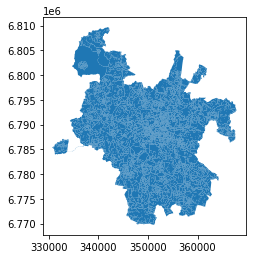

In [ ]:
#Chargement couche du PLU
PLU= gpd.read_file("index.html?format=geojson.11", encoding='utf-8')
PLU = PLU.to_crs("EPSG:2154")
PLU.plot()
PLU.head()

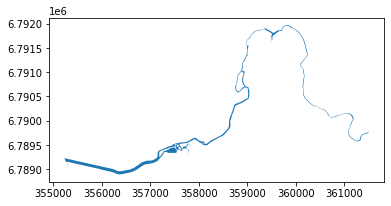

In [ ]:
# Ne garder que les troncons de tyoe "fleuve" dans la commune de Cesson
Fleuve = Hydrographie[(Hydrographie["type_hydro_nom"] == 'fleuve')]
HydroCesson = gpd.overlay(Fleuve, Cesson, how='intersection')
HydroCesson.plot()

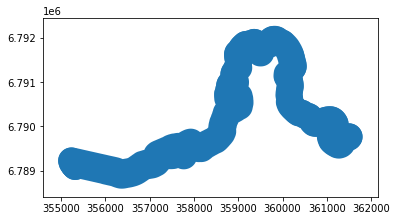

In [ ]:
#Faire un buffer de 300m autour de la couche hydro

HydroCesson['geometry'] = HydroCesson['geometry'].buffer(300)
HydroCesson.plot()

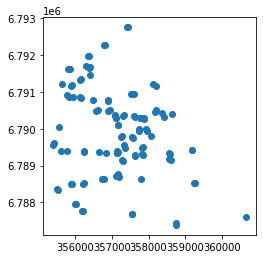

In [ ]:
# Ne garder que les arrêts de bus dans la commune de Cesson
Arretbus = gpd.overlay(Bus, Cesson, how='intersection')
Arretbus.plot()

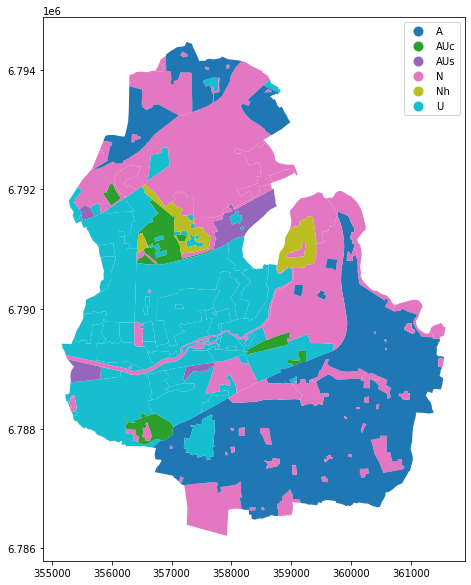

In [ ]:
#Ne garder sur le PLU de Cesson
PLUCesson = gpd.overlay(PLU, Cesson, how='intersection')
PLUCesson.plot(figsize=(10,10),column='typezone', legend=True)


,commune,nom,type,created_1,updated_1,ID_Bati,Surface_Batiment,hydro_visible,deno_hydr_nom,objectid,type_hydro_nom,gml_id,ope_id,hydro_code_insee,deno_hydro_id,type_hydro_id,hydro_date_maj,id,prefixe,code,created_2,updated_2,ID_Section,Surface_Section,geometry
0,35051,None,01,2004-05-27,2018-06-12,736,81.051872,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,"POLYGON ((357711.452 6789680.253, 357722.668 6..."
1,35051,None,01,2004-05-27,2018-06-12,737,181.174443,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,"POLYGON ((357706.326 6789704.831, 357706.507 6..."
2,35051,None,01,2004-05-27,2018-06-12,738,224.032283,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,"POLYGON ((357686.500 6789709.706, 357688.759 6..."
3,35051,None,02,2013-01-28,2018-06-12,739,84.375997,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,"POLYGON ((357705.318 6789701.984, 357705.833 6..."
4,35051,None,01,2013-01-28,2018-06-12,740,532.989823,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,"POLYGON ((357753.947 6789736.717, 357762.041 6..."


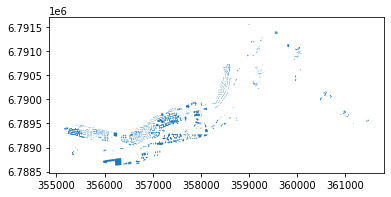

In [ ]:
# Isoler les batiments situés à moins de 300m de la Vilaine
Batirisque = gpd.overlay(Batiments, HydroCesson, how='intersection')
Batirisque.plot()
Batirisque.head()

,nom,nomcommune,code_1,mobilier,estaccessiblepmr,id_1,codeinseecommune,id_2,prefixe_1,code_2,created_1,updated_1,ID_Section_1,Surface_Section_1,hydro_visible,deno_hydr_nom,objectid,type_hydro_nom,gml_id,ope_id,hydro_code_insee,deno_hydro_id,type_hydro_id,hydro_date_maj,id,prefixe_2,code,created_2,updated_2,ID_Section_2,Surface_Section_2,geometry
0,Cesson Gare,Cesson-Sévigné,2057,Abri simple,true,2057,35051,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,POINT (357619.794 6789259.371)
1,Peupliers,Cesson-Sévigné,2058,Abri simple,true,2058,35051,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,POINT (357284.308 6789146.601)
2,Vilaine,Cesson-Sévigné,2013,Abri simple,true,2013,35051,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,POINT (357331.622 6789560.953)
3,Sports et Nature Ev,Cesson-Sévigné,9027,None,false,9027,35051,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,POINT (357154.935 6789337.393)
4,Lycée Sévigné,Cesson-Sévigné,2091,Abri simple,true,2091,35051,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,1,la Vilaine,4958,fleuve,v_hydro.4958,1.0,35266.0,2.0,3,2020-07-22,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196,POINT (358074.958 6789812.908)


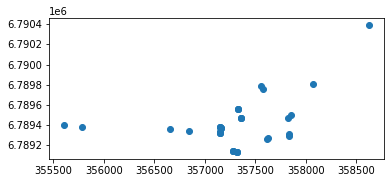

In [ ]:
# Isoler les arrêts de bus situés à moins de 300m de la Vilaine
Busrisque = gpd.overlay(Arretbus, HydroCesson, how='intersection')
Busrisque.plot()
Busrisque.head()

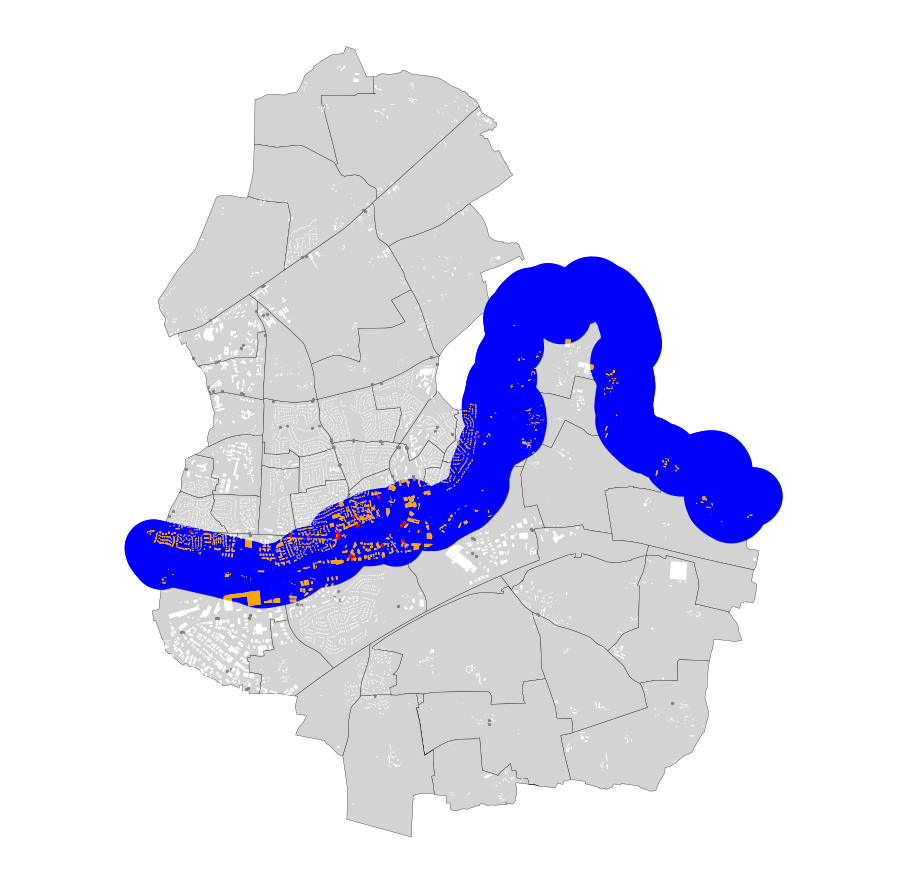

In [ ]:
#Carte récapitulative

map5, ax = plt.subplots(figsize=(16,16))
Sections.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.3)
HydroCesson.plot(ax=ax, color="blue" )
Arretbus.plot(ax=ax, color="grey",markersize=5)
Busrisque.plot(ax=ax, color="red",markersize=5)
Batiments.plot(ax=ax, color="white", linewidth=0.1)
Batirisque.plot(ax=ax, color="orange", linewidth=0.1)
ax.axis("off")
plt.axis("equal")
plt.show()

,ID_Bati,type,Surface_Batiment,ID_Section_left,Surface_Section_left,ID_Parcelle,Surface_Parcelle,Geometry,index_right,typezone,objectid,libelle,id_docurba,gml_id,datvalid,destdomi,libelong,id,prefixe,code,created,updated,ID_Section_right,Surface_Section_right
0,0,02,10.835598,000-AA,369063.408196,000-AA-89,701.243504,"POLYGON ((357089.170 6790474.569, 357087.759 6...",163,U,2915,UEa,00003505120180125,plu_synthese_2019.2915,20180125,1,non précisé,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196
1,1,01,156.415285,000-AA,369063.408196,000-AA-67,583.170712,"POLYGON ((357099.887 6790523.903, 357097.519 6...",163,U,2915,UEa,00003505120180125,plu_synthese_2019.2915,20180125,1,non précisé,35051000AA,000,AA,2004-06-18,2017-09-14,000-AA,369063.408196


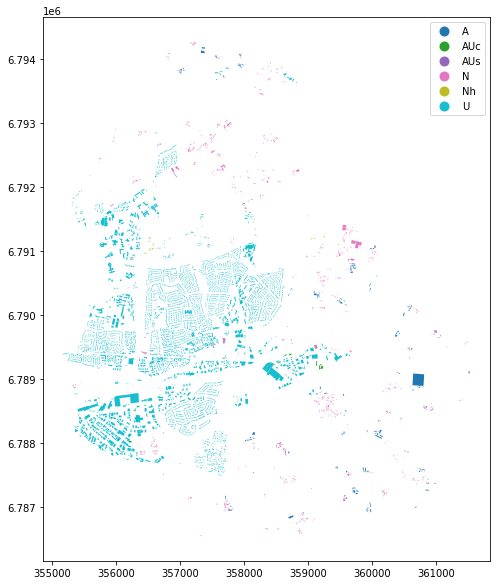

In [ ]:
# Encrichir les batiments des informations de la couche PLU (jointure spatiale)

BatimentsPLU = gpd.sjoin(BatiOK, PLUCesson)
BatimentsPLU.plot(figsize=(10,10),column='typezone', legend=True)
BatimentsPLU.head(2)